# Medidas Estatísticas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d_param={'nomearq':'plan_cap9_LawSuit.xlsx','quantcol':'x',# variável quantitativa
         'catcol':'y',# variável categórica
         'titulo':'Distribuição de Frequencias','xrot': 'avaliação', 'classes':0, # 0=auto
        'yrot': 'Frequencia', 'nomefig': 'graf_dispersao.png'}

In [10]:
df=pd.read_excel(d_param.get('nomearq'))

In [2]:
d = {'x':[78.67, 81, 84.67, 80.97, 81.46, 85.12, 80.32, 80.95, 84.76], 
     'y':[86.67, 88.33, 92.67, 88.05, 89.76, 93.66, 87.94, 86.03, 91.75]}
df = pd.DataFrame(data=d)
df

,x,y
0,78.67,86.67
1,81.00,88.33
2,84.67,92.67
3,80.97,88.05
4,81.46,89.76
5,85.12,93.66
6,80.32,87.94
7,80.95,86.03
8,84.76,91.75


In [6]:
# Gráfico Stem and Leaf  - ramo e folhas
# pip install -U stemgraphic
from stemgraphic import stem_graphic

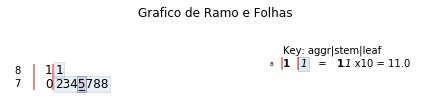

In [7]:
stem_graphic(df[d_param.get('quantcol')])
plt.title('Grafico de Ramo e Folhas')
plt.show()

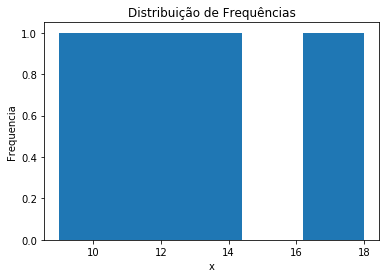

In [13]:
plt.hist(df[d_param.get('quantcol')])
plt.title('Distribuição de Frequências')
plt.xlabel(d_param.get('quantcol'))
plt.ylabel(d_param.get('yrot'))
#plt.savefig(nomearq)
plt.show()

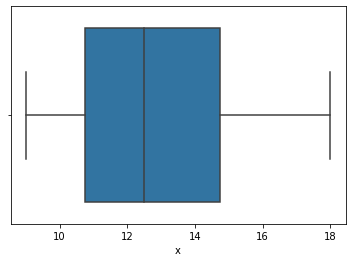

In [14]:
sns.boxplot(x=df[d_param.get('quantcol')])

### 1Q - 2Q - 3Q
- 2Q: mediana
- meio do boxplot: media
## assimetria à direita: mediana < média
## assimetria à esquerda: média > mediana

In [7]:
df[d_param.get('quantcol')].skew()    # assimetria

-0.19136638615493579

## CV (Coeficiente de Variação) = std / média
### cv > 30%            : baixa          homegeidade
### 20% < cv < 30% : média         homog.
### 10% < cv < 2%   : alta             homog.
### cv < 10%            :  muito alta homog.

In [47]:
df[d_param.get('quantcol')].std() / df[d_param.get('quantcol')].mean()

0.8222045242791592

In [5]:
df[d_param.get('quantcol')].describe()

count     9.000000
mean     81.991111
std       2.287097
min      78.670000
25%      80.950000
50%      81.000000
75%      84.670000
max      85.120000
Name: x, dtype: float64

In [6]:
# Amplitude= max - min
print(f'Amplitude= {df.max() - df.min()}')

Amplitude= x    6.45
y    7.63
dtype: float64


In [7]:
df.y.describe()

count     9.000000
mean     89.428889
std       2.701710
min      86.030000
25%      87.940000
50%      88.330000
75%      91.750000
max      93.660000
Name: y, dtype: float64

In [8]:
df[d_param.get('quantcol')].mode()

0    0
dtype: int64

In [7]:
df[d_param.get('quantcol')].median()

3430.0

In [32]:
df[d_param.get('quantcol')].quantile(q=0.5)

1852.0

In [33]:
Q1 = df[d_param.get('quantcol')].quantile(0.25)
Q3 = df[d_param.get('quantcol')].quantile(0.75)
IQR = Q3 - Q1
print(f'Dropbox:  lim_Inf= {Q1-1.5*IQR}  e  lim_Sup= {Q3+1.5*IQR}')

Dropbox:  lim_Inf= 1201.5  e  lim_Sup= 2477.5


In [34]:
df[d_param.get('quantcol')].var()

57226.30040816327

## Z-Escore:   (x - media) /  std
#### valores comuns entre -2 e 2
### DSWP: 3

In [28]:
from scipy.stats import zscore

In [76]:
def ZScore_outlier_detect(df, column):
    lim= 2
    df[column+'_ZS'] = zscore(df[column])
    df[column+'__is_outlier_ZS'] = df[column+'_ZS'].apply(lambda x: x <= -lim or x >= lim)
    df.drop(columns= [column+'_ZS'], axis=1, inplace= True)   # comentar esta linha para manter o xscore calculado

In [77]:
ZScore_outlier_detect(df, d_param.get('quantcol'))
df[df[d_param.get('quantcol')+'__is_outlier_ZS'] == True]

,graduados,salario_inicial,salario_inicial__is_outlier_ZS,salario_inicial__is_outlier_IQR
9,10,4325,True,True


## Boxplot

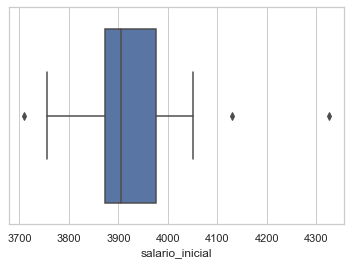

In [13]:
sns.set(style='whitegrid')
ax = sns.boxplot(x=df[d_param.get('quantcol')])

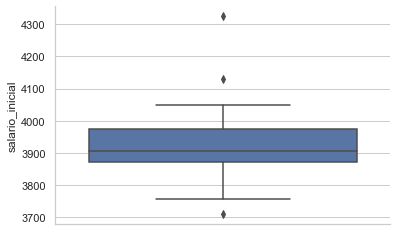

In [18]:
ax = sns.boxplot(y=df[d_param.get('quantcol')])
sns.despine()

In [87]:
def IQR_score_outlier_detect(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    Lim_Inf= Q1-1.5*IQR
    Lim_Sup= Q3+1.5*IQR
    df[column+'__is_outlier_IQR'] = df[column].apply(lambda x: x <= Lim_Inf or x >= Lim_Sup)

In [88]:
IQR_score_outlier_detect(df, d_param.get('quantcol'))
df[df[d_param.get('quantcol')+'__is_outlier_IQR'] == True]

,graduados,salario_inicial,salario_inicial__is_outlier_ZS,salario_inicial__is_outlier_IQR
5,6,3710,False,True
7,8,4130,False,True
9,10,4325,True,True


In [ ]:
# apagar linhas com zscore ou iqr = true
#df.drop(labels=df2[(df2['salario_inicial__is_outlier_ZS']==True) | (df2['salario_inicial__is_outlier_IQR']== True)].index,axis=0,inplace=True)

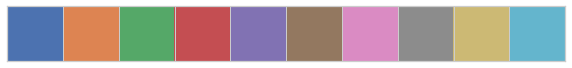

In [19]:
sns.palplot(sns.color_palette())